# HandWritten Number Prediction


**Aim:** To apply single layer perceptron on the mnist dataset and predict the ouput on the test data

In [ ]:
#importing libraries
import cv2 #it will allow us to load images
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as pt


In [ ]:
#loading mnist dataset
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print('The shape of the training inputs:', x_train.shape)
print('The shape of the training labels:',y_train.shape)
print('The shape of the testing inputs:',x_test.shape)
print('The shape of the testing labels:',y_test.shape)

The shape of the training inputs: (60000, 28, 28)
The shape of the training labels: (60000,)
The shape of the testing inputs: (10000, 28, 28)
The shape of the testing labels: (10000,)


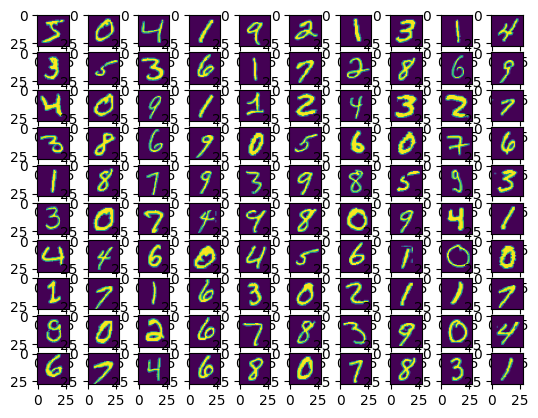

In [ ]:
#plotting the first 10 images in the train dataset
cnt=0
f,a = pt.subplots(10,10)
for i in range(10):
  for j in range(10):
    a[i, j].imshow(x_train[cnt])
    cnt += 1

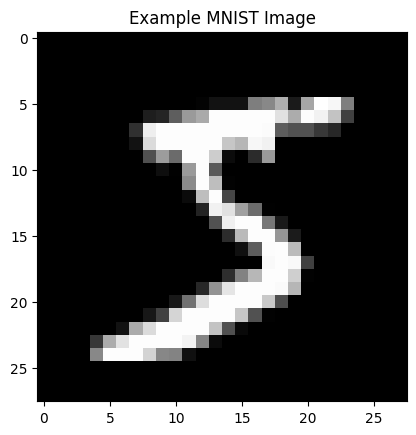

In [ ]:
# Display an example image
pt.imshow(x_train[0].reshape(28,28), cmap='gray')
pt.title('Example MNIST Image')
pt.show()

In [ ]:
#preprocessing the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

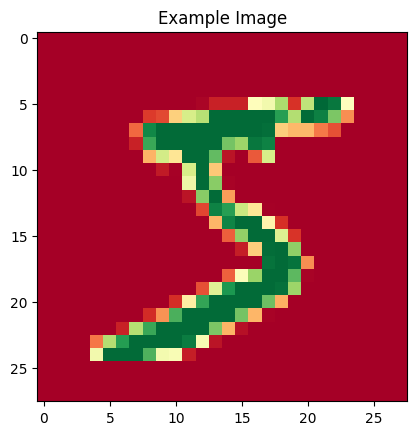

In [ ]:
pt.imshow(x_train[0].reshape(28,28),cmap='RdYlGn')
pt.title('Example Image')
pt.show()

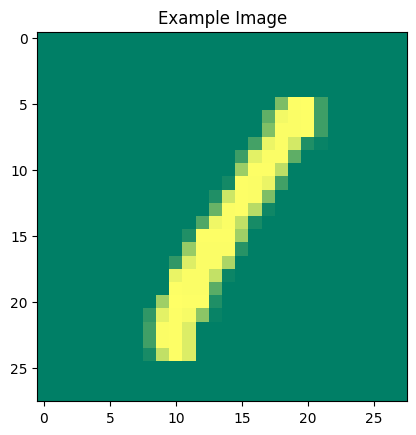

In [ ]:
pt.imshow(x_train[3].reshape(28,28),cmap='summer')
pt.title('Example Image')
pt.show()

In [ ]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1) #normalising the dataset

In [ ]:
model = tf.keras.models.Sequential() #taking the model


In [ ]:
model.add(tf.keras.layers.Flatten(input_shape=(28,28))) #adding the input layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu)) #adding hidden layer

In [ ]:
model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax)) #adding output layer

In [ ]:
model.summary()#printing the summary of the model

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy']) #compiling the model

In [ ]:
# Define a single layer perceptron model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(10, activation='softmax', input_shape=(28*28,)))
# Define a single layer perceptron model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(10, activation='softmax', input_shape=(28*28,)))
# Compile the model - It is important to compile the model after it is defined.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Reshape x_train to flatten the images
x_train_flattened = x_train.reshape(-1, 28*28) # -1 infers the number of samples
# Train the model using the flattened data
history=model.fit(x_train_flattened,
y_train,
epochs=10,
batch_size=100,
validation_split=0.2)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6945 - loss: 1.3677 - val_accuracy: 0.8818 - val_loss: 0.5163
Epoch 2/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8738 - loss: 0.5041 - val_accuracy: 0.8978 - val_loss: 0.3950
Epoch 3/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8920 - loss: 0.4066 - val_accuracy: 0.9061 - val_loss: 0.3517
Epoch 4/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9038 - loss: 0.3564 - val_accuracy: 0.9108 - val_loss: 0.3289
Epoch 5/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9060 - loss: 0.3356 - val_accuracy: 0.9126 - val_loss: 0.3155
Epoch 6/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9109 - loss: 0.3174 - val_accuracy: 0.9154 - val_loss: 0.3064
Epoch 7/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9122 - loss: 0.3118 - val_accuracy: 0.9168 - val_loss: 0.2995
Epoch 8/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9160 - loss: 0.3000 - val_accuracy: 0.

In [ ]:
# Evaluating the model
x_test_flattened = x_test.reshape(-1, 28*28) # Flatten the x_test data
test_loss, test_acc = model.evaluate(x_test_flattened, y_test)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9086 - loss: 0.3242
Test accuracy: 0.920199990272522


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
# Generate predictions using the model
y_pred = model.predict(x_test_flattened)
y_pred_classes = np.argmax(y_pred, axis=1) # Convert predictions to class labels
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(cm)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Confusion Matrix:
[[ 954    0    0    1    0    7   10    3    4    1]
 [   0 1113    4    1    0    3    4    0   10    0]
 [  12    8  915   19   11    2   13   11   38    3]
 [   3    0   14  921    1   27    4    8   21   11]
 [   1    0    6    1  916    0   13    4    9   32]
 [   9    1    5   38    5  758   22    8   40    6]
 [  11    3    8    1    8   11  911    1    4    0]
 [   2   10   27    7    7    0    0  940    2   33]
 [   6    6    7   26   12   27   12   10  856   12]
 [   9    6    3   10   23    7    0   23   10  918]]


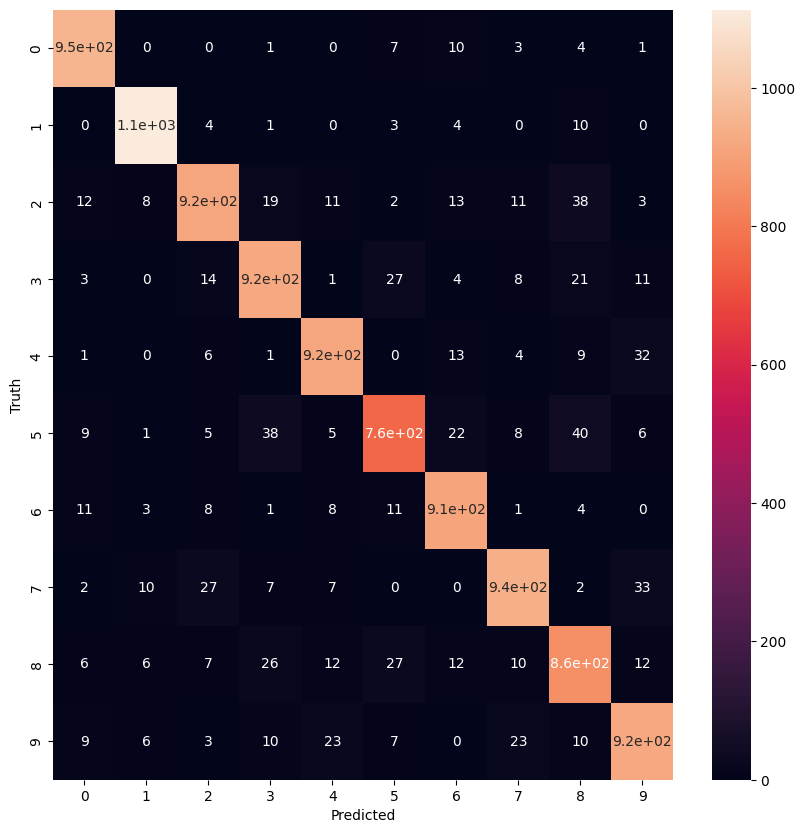

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

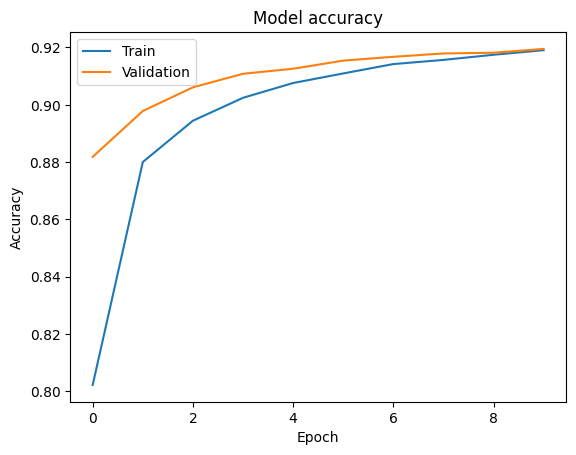

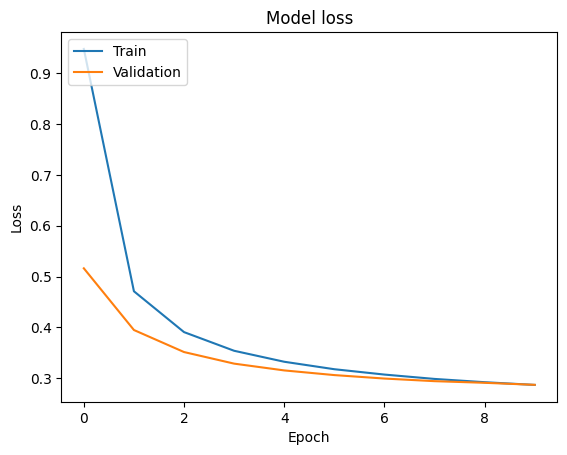

In [ ]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


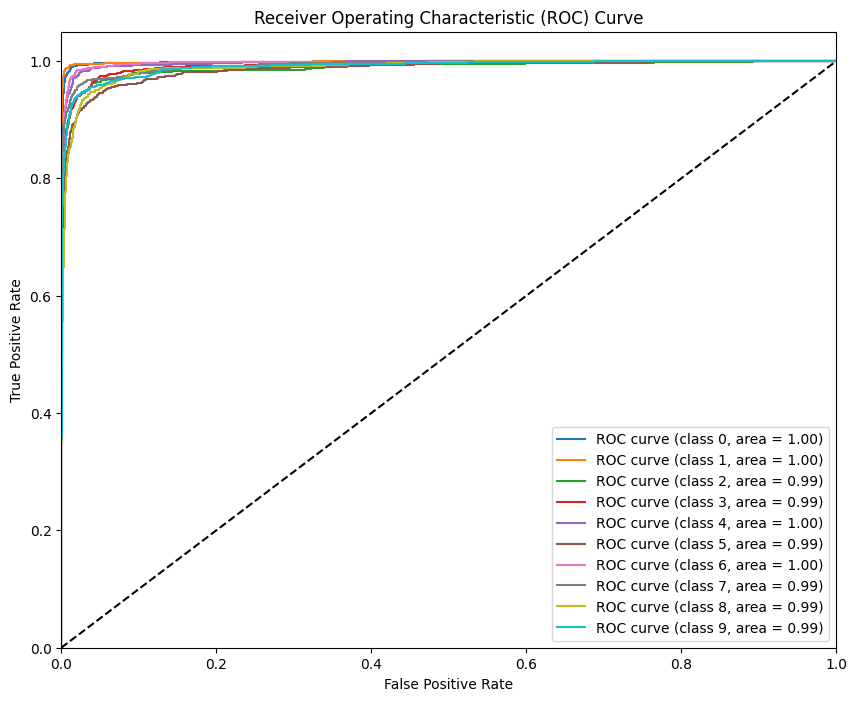

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
# Get predicted probabilities for each class
# Reshape x_test to be 2-dimensional
x_test_flattened = x_test.reshape(-1, 28*28)
y_pred_proba = model.predict(x_test_flattened)
# Binarize the labels
y_test_bin = label_binarize(y_test, classes=np.arange(10))
# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
  fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])
# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(10):
   plt.plot(fpr[i], tpr[i], label='ROC curve (class %d, area = %0.2f)' % (i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


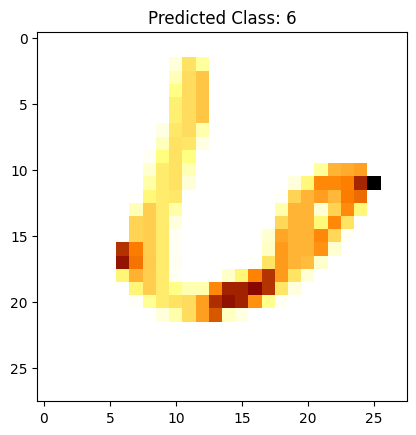

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Select a random image from the test dataset
image_index = np.random.randint(0, len(x_test))
test_image = x_test[image_index]
# Reshape the image to match the model's input shape
test_image = test_image.reshape(1, 28*28) # Changed to flatten the input image
# Make a prediction
prediction = model.predict(test_image)
# Get the predicted class
predicted_class = np.argmax(prediction)
# Display the image and the prediction
plt.imshow(test_image.reshape(28, 28), cmap='afmhot_r')
plt.title(f'Predicted Class: {predicted_class}')
plt.show()

**Result:** Model is built on the mnist dataset using tensorflow and the output is observed



**Accuracy:**92%